## Problem Statement:

### Auction: Players who can fulfil the role of pinch hitter in powerplay for SRH?

- Player analysis
- Team analysis
- Batsmen evaluation (ranking) for that particular role

### Keywords: Pinch hitter, Powerplay, SRH
- Quantifying these words:
    - Pinch Hitter = High SR, Low balls_per_boundary, Decent Runs, Decent Balls Faced
    - Powerplay = 1-6 overs
    - SRH = Analysis By Team

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
deliveries = pd.read_csv("C:\\Users\\SHETTS60\\Documents\\Python scripts\\Cricket analytics Materials\MSD Analysis\\deliveries.csv")
matches = pd.read_csv("C:\\Users\\SHETTS60\\Documents\\Python scripts\\Cricket analytics Materials\\MSD Analysis\\matches.csv")

In [4]:
#Writing function for balls per dismissal since dismissal can be 0 hence if we divide the balls/Dismissals it will give infinity

def balls_per_dismissal(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1 
    
def balls_per_boundary(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1 
    
#combining all into one Function

def playerStatistics(df):
    
    
    df['isDot'] = df['batsman_runs'].apply(lambda x:1 if x==0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x:1 if x==1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x:1 if x==2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x:1 if x==3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x:1 if x==4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x:1 if x==6 else 0)
    
    runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum()).rename(columns ={"batsman_runs":"runs"}).reset_index()
    balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).rename(columns ={"match_id":"balls"}).reset_index()
    innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x))))).rename(columns ={"match_id":"innings"}).reset_index()
    dismissed = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).rename(columns ={"player_dismissed":"dismissals"}).reset_index()
    
    dots = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).rename(columns ={"isTwo":"dots"}).reset_index()
    ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).rename(columns ={"isOne":"ones"}).reset_index()
    twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).rename(columns ={"isTwo":"twos"}).reset_index()
    threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).rename(columns ={"isThree":"threes"}).reset_index()
    fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).rename(columns ={"isFour":"fours"}).reset_index()
    sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).rename(columns ={"isSix":"sixes"}).reset_index()
    
    df = pd.merge(innings,runs, on ='batsman').merge(balls, on ='batsman').merge(dismissed,on ='batsman').merge(dots,on ='batsman').merge(ones,on ='batsman').merge(twos,on ='batsman').merge(threes,on ='batsman').merge(fours,on ='batsman').merge(sixes,on ='batsman')
   
    df['RPI'] = df.apply(lambda x:(x['runs']/x['innings']), axis=1)
    
    #Strike rate
    df['SR'] = df.apply(lambda x:(100 * x['runs']/x['balls']), axis=1)
    #balls per dismissals
    df['BPD'] = df.apply(lambda x:balls_per_dismissal(x['balls'],x['dismissals']), axis=1)
    #balls Per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
    return df

In [5]:
df = playerStatistics(deliveries)

In [6]:
df.head()

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,RPI,SR,BPD,BPB
0,A Ashish Reddy,23,280,196,15,20,83,20,1,16,15,12.173913,142.857143,13.066667,6.322581
1,A Chandila,2,4,7,1,0,4,0,0,0,0,2.000000,57.142857,7.000000,7.000000
2,A Chopra,6,53,75,5,2,21,2,0,7,0,8.833333,70.666667,15.000000,10.714286
3,A Choudhary,3,25,20,2,1,13,1,0,1,1,8.333333,125.000000,10.000000,10.000000
4,A Dananjaya,1,4,5,0,1,2,1,0,0,0,4.000000,80.000000,5.000000,5.000000


### 1.3 : Performance in different phases of play

In [7]:
def phase(over):
    if over <= 6:
        return 'Powerplay'
    elif over <= 15:
        return 'Middle'
    else:
        return 'Death'

In [8]:
deliveries['Phase'] = deliveries["over"].apply(lambda x:phase(x))

In [9]:
#combining all into one Function

def phasesOfplay(df, current_phase):
    
    df = df[df["Phase"] == current_phase]
    df.reset_index(inplace = True, drop = True)
    
    df['isDot'] = df['batsman_runs'].apply(lambda x:1 if x==0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x:1 if x==1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x:1 if x==2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x:1 if x==3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x:1 if x==4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x:1 if x==6 else 0)
    
    runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum()).rename(columns ={"batsman_runs":"runs"}).reset_index()
    balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).rename(columns ={"match_id":"balls"}).reset_index()
    innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x))))).rename(columns ={"match_id":"innings"}).reset_index()
    dismissed = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).rename(columns ={"player_dismissed":"dismissals"}).reset_index()
    
    dots = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).rename(columns ={"isTwo":"dots"}).reset_index()
    ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).rename(columns ={"isOne":"ones"}).reset_index()
    twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).rename(columns ={"isTwo":"twos"}).reset_index()
    threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).rename(columns ={"isThree":"threes"}).reset_index()
    fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).rename(columns ={"isFour":"fours"}).reset_index()
    sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).rename(columns ={"isSix":"sixes"}).reset_index()
    
    df = pd.merge(innings,runs, on ='batsman').merge(balls, on ='batsman').merge(dismissed,on ='batsman').merge(dots,on ='batsman').merge(ones,on ='batsman').merge(twos,on ='batsman').merge(threes,on ='batsman').merge(fours,on ='batsman').merge(sixes,on ='batsman')
   
    df['RPI'] = df.apply(lambda x:(x['runs']/x['innings']), axis=1)
    
    #Strike rate
    df['SR'] = df.apply(lambda x:(100 * x['runs']/x['balls']), axis=1)
    #balls per dismissals
    df['BPD'] = df.apply(lambda x:balls_per_dismissal(x['balls'],x['dismissals']), axis=1)
    #balls Per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
    return df

In [10]:
pp_df = phasesOfplay(deliveries, 'Powerplay')
mid_df = phasesOfplay(deliveries, 'Middle')
dth_df = phasesOfplay(deliveries, 'Death')

In [11]:
pp_df.head()

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,RPI,SR,BPD,BPB
0,A Ashish Reddy,1,5,7,1,0,1,0,0,1,0,5.000000,71.428571,7.000000,7.000000
1,A Chopra,5,27,41,2,0,11,0,0,4,0,5.400000,65.853659,20.500000,10.250000
2,A Flintoff,1,14,15,0,0,1,0,1,1,1,14.000000,93.333333,15.000000,7.500000
3,A Hales,6,118,82,3,7,24,7,0,11,6,19.666667,143.902439,27.333333,4.823529
4,A Mishra,1,1,5,0,0,1,0,0,0,0,1.000000,20.000000,5.000000,5.000000


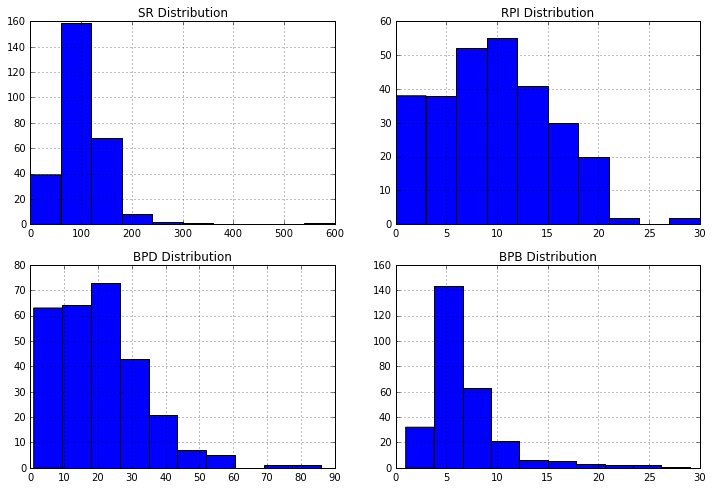

In [12]:
plt.figure(figsize = (12, 8))

#subplot(has 2 row, 2 columns, and this plot is the first plot(plot number))
plt.subplot(221)
pp_df.SR.hist()
plt.title('SR Distribution')

plt.subplot(222)
pp_df.RPI.hist()
plt.title('RPI Distribution')

plt.subplot(223)
pp_df.BPD.hist()
plt.title('BPD Distribution')

plt.subplot(224)
pp_df.BPB.hist()
plt.title('BPB Distribution')

plt.show()

In [13]:
import seaborn as sns

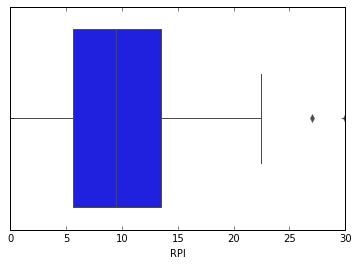

In [14]:
#We can find outliers
sns.boxplot(pp_df['RPI'])

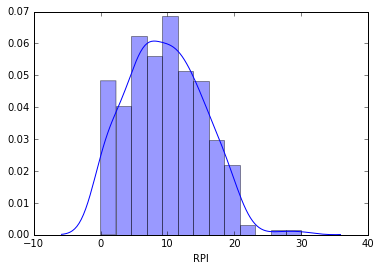

In [15]:
sns.distplot(pp_df['RPI'])

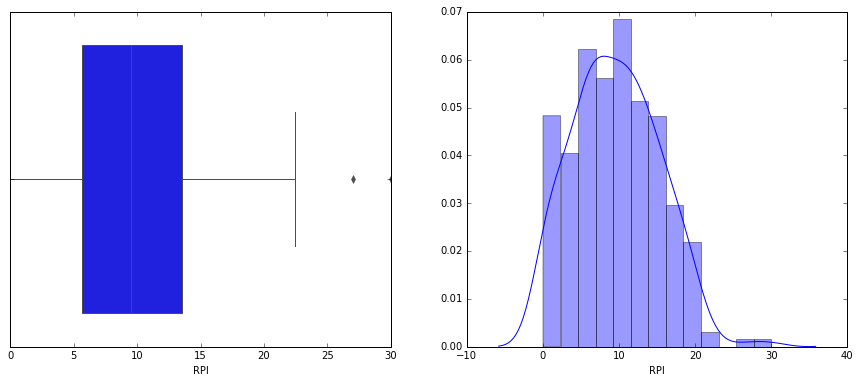

In [16]:
#to print both of the above together make use of subplot
plt.figure(figsize = (15, 6))

plt.subplot(121)
sns.boxplot(pp_df['RPI'])

plt.subplot(122)
sns.distplot(pp_df['RPI'])
plt.show()